In [6]:
PREPROCESSED_PATH="/ADNI/bet_rescaled_ADNI/"
OUTPUT_PATH="/ADNI/entropy_sliced_ADNI"

In [7]:
from src.reader import nii_dir_generator, max_entropy_slice_generator
import os 
from src.normalize import normalize_img
from matplotlib import pyplot as plt
from tqdm import notebook

In [ ]:
diagnosis = "mci"

pbar = notebook.tqdm(total=len([name for name in os.listdir(os.path.join(PREPROCESSED_PATH, diagnosis))]))
for fname, img in nii_dir_generator(input_dir=os.path.join(PREPROCESSED_PATH, diagnosis),default_shape=(192, 192, 160)):
    img_num = fname.split('_')[-2][1:]
    ind = 0 
    for s in max_entropy_slice_generator(img, n=8, normalizer=normalize_img):
        s_path = os.path.join(OUTPUT_PATH, diagnosis, img_num + "_" + str(ind)+".png")
        plt.imsave(s_path,s)
        ind += 1
    pbar.update(1)

In [ ]:
max_entropy_slice_generator?

In [5]:
!pip install opencv-python

In [ ]:
!mkdir /ADNI/entropy_sliced_ADNI/cn

In [ ]:
!mkdir /ADNI/entropy_sliced_ADNI/mci

In [57]:
pbar.update(1)

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
import numpy as np

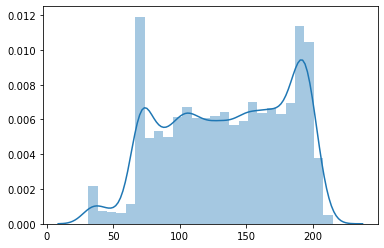

In [10]:
img = cv.imread('/ADNI/entropy_sliced_ADNI/ad/36514_2.png',0)
hist,bins = np.histogram(img.ravel(),256,[0,256])
sns.distplot(list(filter(lambda x: x != 30.0, img.ravel())))

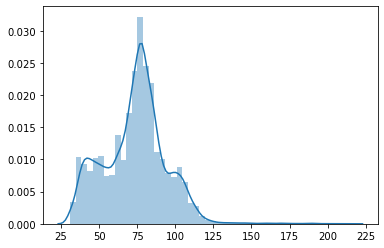

In [11]:
img = cv.imread('/ADNI/entropy_sliced_ADNI/ad/54731_2.png',0)
hist,bins = np.histogram(img.ravel(),256,[0,256])
sns.distplot(list(filter(lambda x: x != 30.0, img.ravel())))

In [13]:
img = cv.imread('/ADNI/entropy_sliced_ADNI/ad/',0)
hist,bins = np.histogram(img.ravel(),256,[0,256])
sns.distplot(list(filter(lambda x: x != 30.0, img.ravel())))

AttributeError: 'NoneType' object has no attribute 'ravel'

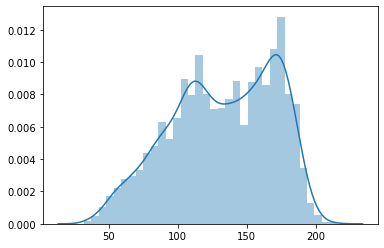

In [32]:
img = cv.imread('/ADNI/entropy_sliced_ADNI/ad/52066_2.png',0)
hist,bins = np.histogram(img.ravel(),256,[0,256])
sns.distplot(list(filter(lambda x: x != 30.0, img.ravel())))

In [15]:
from scipy.stats import normaltest

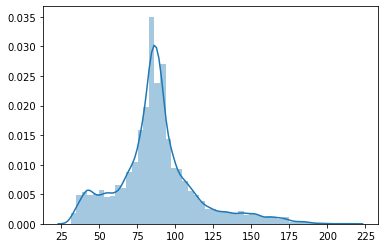

In [16]:
img = cv.imread('/ADNI/entropy_sliced_ADNI/ad/35911_3.png',0)
hist,bins = np.histogram(img.ravel(),256,[0,256])
filt = list(filter(lambda x: x != 30.0, img.ravel()))
sns.distplot(filt)



In [ ]:
normaltest(np.random.normal(0, 1, size=10000000000))

In [17]:
import cv2 as cv
import os

In [27]:
def calc_histogram_distance(src, test, compare_method): 
    assert compare_method >= 0
    assert compare_method < 6
    
    src = cv.imread(src)
    test = cv.imread(test)
    
    if src is None or test is None: 
        raise(f'Could not open images {src}, {test}')
        
    hsv_src  = cv.cvtColor(src, cv.COLOR_BGR2HSV)
    hsv_test = cv.cvtColor(test, cv.COLOR_BGR2HSV)
    
    h_bins = 50
    s_bins = 60
    histSize = [h_bins, s_bins]
    # hue varies from 0 to 179, saturation from 0 to 255
    h_ranges = [0, 180]
    s_ranges = [0, 256]
    ranges = h_ranges + s_ranges 
    # Use the 0-th and 1-st channels
    channels = [0, 1]
    
    hist_src = cv.calcHist([hsv_src], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(hist_src, hist_src, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    
    hist_test = cv.calcHist([hsv_test], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(hist_test, hist_test, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    
    return cv.compareHist(hist_src, hist_test, compare_method)

In [31]:
calc_histogram_distance('/ADNI/entropy_sliced_ADNI/ad/39919_3.png','/ADNI/entropy_sliced_ADNI/ad/39919_3.png',4)

0.0

In [35]:
test = '/ADNI/entropy_sliced_ADNI/ad/36514_2.png'
tested = [ '39919_2.png',
          '40239_1.png',
          '38918_0.png',
          '39185_6.png',
          '39185_6.png'
]
hist_diff = []

for i in tested:
    hist_diff.append(calc_histogram_distance(os.path.join('/ADNI/entropy_sliced_ADNI/ad', i), test,4 ))

In [33]:
src_base = cv.imread('/ADNI/entropy_sliced_ADNI/ad/54731_2.png')
src_test1 = cv.imread('/ADNI/entropy_sliced_ADNI/ad/35911_3.png')
src_test2 = cv.imread('/ADNI/entropy_sliced_ADNI/ad/36514_2.png')
if src_base is None or src_test1 is None or src_test2 is None:
    print('Could not open or find the images!')
    exit(0)
hsv_base = cv.cvtColor(src_base, cv.COLOR_BGR2HSV)
hsv_test1 = cv.cvtColor(src_test1, cv.COLOR_BGR2HSV)
hsv_test2 = cv.cvtColor(src_test2, cv.COLOR_BGR2HSV)
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]
h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]
# hue varies from 0 to 179, saturation from 0 to 255
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists
# Use the 0-th and 1-st channels
channels = [0, 1]
hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_half_down = cv.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test1 = cv.calcHist([hsv_test1], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test2 = cv.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
for compare_method in range(6):
    base_base = cv.compareHist(hist_base, hist_base, compare_method)
    base_test1 = cv.compareHist(hist_base, hist_test1, compare_method)
    base_test2 = cv.compareHist(hist_base, hist_test2, compare_method)
    print('Method:', compare_method, 'Perfect, Bad, Good :',\
          base_base, '/', base_test1, '/', base_test2)

Method: 0 Perfect, Bad, Good : 1.0 / 0.9847418530263184 / 0.9714378469803627
Method: 1 Perfect, Bad, Good : 0.0 / 1.0237708616906387 / 12.837732467718862
Method: 2 Perfect, Bad, Good : 2.592842713391292 / 1.6526694028907514 / 1.2251236036499904
Method: 3 Perfect, Bad, Good : 0.0 / 0.2355594214979352 / 0.4626315841089765
Method: 4 Perfect, Bad, Good : 0.0 / 1.1396319099435084 / 2.8331411931958663
Method: 5 Perfect, Bad, Good : 0.0 / 1.6534277096422019 / 3.85312303445235


In [40]:
test = '/ADNI/entropy_sliced_ADNI/ad/36514_2.png'
tested = [ '40731_0.png',
          '45213_0.png',
          '45910_0.png',
          '47228_0.png',
          '48581_0.png',
          '48996_0.png'
]
hist_diff = []

for i in tested:
    hist_diff.append(calc_histogram_distance(os.path.join('/ADNI/entropy_sliced_ADNI/ad', i), test,4 ))

In [67]:
from shutil import copyfile

In [70]:
test_good = '/ADNI/entropy_sliced_ADNI/ad/36514_2.png'
test_bad = '/ADNI/entropy_sliced_ADNI/ad/35911_3.png'
INPUT_PATH = '/ADNI/entropy_sliced_ADNI'
OUTPUT_PATH = '/ADNI/hist_selected_ADNI'
diagnosis = 'cn'
os.makedirs(os.path.join(OUTPUT_PATH,'close', diagnosis), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_PATH,'distant', diagnosis), exist_ok=True)
for (dirpath, dirnames, filenames) in os.walk(os.path.join(INPUT_PATH,diagnosis)):
        for f in filenames:
            if f.endswith("png"):
                good = calc_histogram_distance(os.path.join(dirpath, f), test_good,4)
                bad = calc_histogram_distance(os.path.join(dirpath, f), test_bad,4)
                if good < bad: 
                    copyfile(os.path.join(dirpath, f),os.path.join(OUTPUT_PATH,'close', diagnosis, f))
                else:
                    copyfile(os.path.join(dirpath, f),os.path.join(OUTPUT_PATH,'distant', diagnosis, f))
                
                    

In [56]:
os.makedirs(os.path.join(OUTPUT_PATH,'close'), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_PATH,'distant'), exist_ok=True)

In [55]:
os.path.join(OUTPUT_PATH,'close')

'/ADNI/entropy_sliced_ADNI/close'

In [61]:
os.makedirs(os.path.dirname(os.path.join(OUTPUT_PATH,'close', 'ad')))

FileExistsError: [Errno 17] File exists: '/ADNI/entropy_sliced_ADNI/close'